In [1]:
import os
#print(os.listdir('../input'))

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [31]:
from aif360.datasets import StandardDataset
from aif360.metrics import BinaryLabelDatasetMetric, ClassificationMetric
import matplotlib.patches as patches
from aif360.algorithms.preprocessing import Reweighing
#from packages import *
#from ml_fairness import *
import matplotlib.pyplot as plt
import seaborn as sns



from IPython.display import Markdown, display

In [50]:
# index_col function help to remove the coloumn

df= pd.read_csv('../../data/german_credit_data.csv',index_col=0)

In [51]:
# shape of the data
df.shape

(1000, 10)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


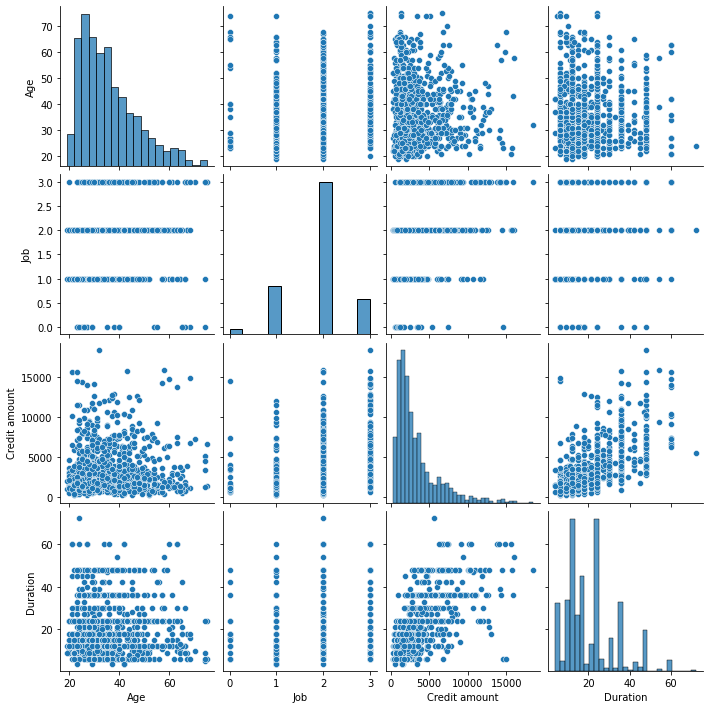

In [53]:
# removing the Unnamed column
#df.drop([' '],axis =1 )
sns.pairplot(df)

In [54]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

<AxesSubplot:>

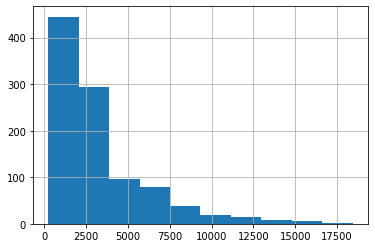

In [55]:
df['Credit amount'].hist()

In [56]:
df['Credit amount_log'] = np.log(df['Credit amount'])

<AxesSubplot:>

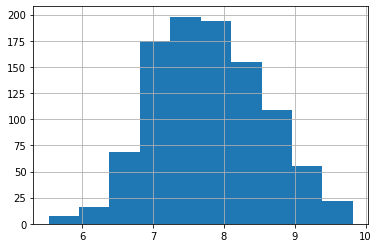

In [57]:
df['Credit amount_log'].hist()

In [58]:
# summary statistics help to understand the distribution of data
# if the SD of any variable is 0 then we need to get rid of that 
# we will not get for categorical variable , only for numerical and continious numerical variable

df.describe()

,Age,Job,Credit amount,Duration,Credit amount_log
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,7.788691
std,11.375469,0.653614,2822.736876,12.058814,0.776474
min,19.000000,0.000000,250.000000,4.000000,5.521461
25%,27.000000,2.000000,1365.500000,12.000000,7.219276
50%,33.000000,2.000000,2319.500000,18.000000,7.749107
75%,42.000000,2.000000,3972.250000,24.000000,8.287088
max,75.000000,3.000000,18424.000000,72.000000,9.821409


In [59]:
cols=df.columns.tolist()

In [60]:
cols

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk',
 'Credit amount_log']

In [61]:
cols = cols[-1:] + cols[:-1]

In [62]:
cols

['Credit amount_log',
 'Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose',
 'Risk']

In [63]:
df=df[cols]

In [64]:
df.head()

,Credit amount_log,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,7.063904,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,8.691315,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,7.647786,49,male,1,own,little,NaN,2096,12,education,good
3,8.972337,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,8.490849,53,male,2,free,little,little,4870,24,car,bad


In [65]:
# Null data
df.isnull().sum()

Credit amount_log      0
Age                    0
Sex                    0
Job                    0
Housing                0
Saving accounts      183
Checking account     394
Credit amount          0
Duration               0
Purpose                0
Risk                   0
dtype: int64

In [66]:
# this will help us to know the fields under each header

print("Purpose : ",df.Purpose.unique())
print("Job : ",df.Job.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving account : ",df['Saving account'].unique())
print("Checking account : ",df['Checking account'].unique())
print("Risk : ",df['Risk'].unique())

Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Job :  [2 1 3 0]
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']


KeyError: 'Saving account'

In [49]:
print("Saving accounts : ",df['Saving account'].value_counts())
print("Checking account : ",df['Checking account'].value_counts())

KeyError: 'Saving account'

# EDA

# Exploring data

In [ ]:
sns.countplot('Risk', data=df)

In [ ]:
sns.countplot('Sex', data=df)

In [ ]:
dimension = (15,5)
fig, ax = plt.subplots(figsize=dimension)
sns.countplot('Purpose', data=df)

In [ ]:
sns.countplot('Saving account', data=df)

In [ ]:
sns.countplot('Checking account', data=df)

In [ ]:
dimension = (11, 6)
fig, ax = plt.subplots(figsize=dimension)
sns.countplot('Purpose', data=df)

In [ ]:
sns.catplot(x='Purpose', y='Credit amount', hue='Risk', kind='bar', palette='Set1', data=df, height=4, aspect=4)
plt.title('Mean Credit Amount by purpose and Risk')
plt.show()

In [ ]:
sns.catplot(x='Duration', y='Credit amount', hue='Risk', kind='bar', palette='Set1', data=df, height=4, aspect=4)
plt.title('Mean Duration by Credit Amount and Risk')
plt.show()

In [ ]:
sns.catplot(x='Duration', y='Credit amount', hue='Sex', kind='bar', palette='Set1', data=df, height=4, aspect=4)
plt.title('Mean Duration by Credit Amount and Sex')
plt.show()

In [ ]:
sns.catplot(x='Job', y='Credit amount', hue='Risk', kind='bar', palette='Set1', data=df, height=4, aspect=4)
plt.title('Mean job by Credit Amount and Risk')
plt.show()

In [ ]:
sns.catplot(x='Job', y='Credit amount', hue='Sex', kind='bar', palette='Set1', data=df, height=4, aspect=4)
plt.title('Mean job by Credit Amount and sex')
plt.show()

In [ ]:
sns.catplot(x='Checking account', y='Credit amount', hue='Risk', kind='bar', palette='Set1', data=df, height=4, aspect=4)
plt.title('Mean Checking account by Credit Amount and Risk')
plt.show()

In [ ]:
sns.catplot(x='Saving account', y='Credit amount', hue='Risk', kind='bar', palette='Set1', data=df, height=4, aspect=4)
plt.title('Mean Saving accounts by Credit Amount and Risk')
plt.show()

In [ ]:
dimension = (15, 6)
fig, ax = plt.subplots(figsize=dimension)
sns.countplot(x="Duration", data=df, 
              palette="hls",  hue = "Risk")

In [ ]:
category = ["Checking account", 'Sex']
cm = sns.light_palette("pink", as_cmap=True)
pd.crosstab(df[category[0]],df[category[1]]).style.background_gradient(cmap = cm)

In [ ]:
category = ["Saving account", 'Sex']
cm = sns.light_palette("green", as_cmap=True)
pd.crosstab(df[category[0]],df[category[1]]).style.background_gradient(cmap = cm)

In [ ]:
category = ["Purpose", 'Sex']
cm = sns.light_palette("blue", as_cmap=True)
pd.crosstab(df[category[0]], df[category[1]]).style.background_gradient(cmap = cm)

In [ ]:
category = ["Sex", 'Risk']
cm = sns.light_palette("red", as_cmap=True)
pd.crosstab(df[category[0]], df[category[1]]).style.background_gradient(cmap = cm)

In [ ]:
category = ["Housing",'Sex']
cm = sns.light_palette("black", as_cmap=True)
pd.crosstab(df[category[0]], df[category[1]]).style.background_gradient(cmap = cm)

In [ ]:
category = ["Job",'Sex']
cm = sns.light_palette("violet", as_cmap=True)
pd.crosstab(df[category[0]], df[category[1]]).style.background_gradient(cmap = cm)

In [ ]:
sns.catplot(x='Sex', y='Age', hue='Risk', kind='bar', palette='Set1', data=df, height=3, aspect=3)
plt.title('Mean Sex by Age and Risk')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='Checking account', y='Credit amount', hue=None, data=df, palette='Set1')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(x='Saving account', y='Credit amount', hue=None, data=df, palette='Set1')

In [ ]:
def scatters(credit, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Credit amount",y="Duration", hue=h, palette='Set1', data=df, ax=ax1)
    sns.scatterplot(x="Age",y="Credit amount", hue=h, palette='Set1', data=df, ax=ax2)
    sns.scatterplot(x="Age",y="Duration", hue=h, palette='Set1', data=df, ax=ax3)
    plt.tight_layout()

In [ ]:
scatters(df, h="Saving account")

In [ ]:
scatters(df, h="Checking account")

In [ ]:
scatters(df, h="Risk")

In [ ]:
scatters(df, h="Sex")

# Cleaning 

In [67]:
# this will help to replace all the NAN values with little values in both saving and checking account

#df["Saving accounts"]=df["Saving accounts"].fillna(method="bfill")
#df["Checking account"]=df["Checking account"].fillna(method="bfill")

df.fillna('little',inplace=True)

In [68]:
print("Saving accounts : ",df['Saving accounts'].value_counts())
print("Checking account : ",df['Checking account'].value_counts())

Saving accounts :  little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
Checking account :  little      668
moderate    269
rich         63
Name: Checking account, dtype: int64


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Credit amount_log  1000 non-null   float64
 1   Age                1000 non-null   int64  
 2   Sex                1000 non-null   object 
 3   Job                1000 non-null   int64  
 4   Housing            1000 non-null   object 
 5   Saving accounts    1000 non-null   object 
 6   Checking account   1000 non-null   object 
 7   Credit amount      1000 non-null   int64  
 8   Duration           1000 non-null   int64  
 9   Purpose            1000 non-null   object 
 10  Risk               1000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 93.8+ KB


# Model Building

In [70]:
features = df.iloc[:,:10]
label = df.iloc[:,[-1]]

In [71]:
features.head()

,Credit amount_log,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,7.063904,67,male,2,own,little,little,1169,6,radio/TV
1,8.691315,22,female,2,own,little,moderate,5951,48,radio/TV
2,7.647786,49,male,1,own,little,little,2096,12,education
3,8.972337,45,male,2,free,little,little,7882,42,furniture/equipment
4,8.490849,53,male,2,free,little,little,4870,24,car


In [72]:
label.head()

,Risk
0,good
1,bad
2,good
3,good
4,bad


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
SexinNumeric=LabelEncoder()
HousinginNumeric=LabelEncoder()
SavingaccountinNumeric=LabelEncoder()
CheckingaccountinNumeric=LabelEncoder()
PurposeinNumeric=LabelEncoder()
RiskinNumeric=LabelEncoder()

In [75]:
features['SexinNumeric']=SexinNumeric.fit_transform(features['Sex'])
features['HousinginNumeric']=HousinginNumeric.fit_transform(features['Housing'])
features['SavingaccountinNumeric']=SavingaccountinNumeric.fit_transform(features['Saving accounts'])
features['CheckingaccountinNumeric']=CheckingaccountinNumeric.fit_transform(features['Checking account'])
features['PurposeinNumeric']=PurposeinNumeric.fit_transform(features['Purpose'])
label['RiskinNumeric']=RiskinNumeric.fit_transform(label['Risk'])

In [76]:
features.tail()

,Credit amount_log,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,SexinNumeric,HousinginNumeric,SavingaccountinNumeric,CheckingaccountinNumeric,PurposeinNumeric
995,7.459339,31,female,1,own,little,little,1736,12,furniture/equipment,0,1,0,0,4
996,8.257645,40,male,3,own,little,little,3857,30,car,1,1,0,0,1
997,6.689599,38,male,2,own,little,little,804,12,radio/TV,1,1,0,0,5
998,7.520235,23,male,2,free,little,little,1845,45,radio/TV,1,0,0,0,5
999,8.428581,27,male,2,own,moderate,moderate,4576,45,car,1,1,1,1,1


In [77]:
label.tail()

,Risk,RiskinNumeric
995,good,1
996,good,1
997,good,1
998,bad,0
999,good,1


In [78]:
NewFeatures = features.drop(['Sex','Housing','Saving accounts','Checking account', 'Purpose'], axis='columns')
NewLabel = label.drop(['Risk'], axis='columns')

In [79]:
NewFeatures.head()

,Credit amount_log,Age,Job,Credit amount,Duration,SexinNumeric,HousinginNumeric,SavingaccountinNumeric,CheckingaccountinNumeric,PurposeinNumeric
0,7.063904,67,2,1169,6,1,1,0,0,5
1,8.691315,22,2,5951,48,0,1,0,1,5
2,7.647786,49,1,2096,12,1,1,0,0,3
3,8.972337,45,2,7882,42,1,0,0,0,4
4,8.490849,53,2,4870,24,1,0,0,0,1


In [80]:
NewLabel.head()

,RiskinNumeric
0,1
1,0
2,1
3,1
4,0


In [81]:
NewFeatures = features.drop(['Sex','Housing','Saving accounts', 'Checking account', 'Purpose'], axis='columns').values
NewLabel = label.drop(['Risk'], axis='columns').values

# Test & Train Splitting

In [ ]:
#Create Train Test Split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(NewFeatures,
                                                NewLabel,
                                                test_size=0.20,
                                                random_state=44)

In [ ]:
# Verifying

print(f'X_train dimension: {X_train.shape}')
print(f'X_test dimension: {X_test.shape}')
print(f'\ny_train dimension: {y_train.shape}')
print(f'y_test dimension: {y_test.shape}')

In [ ]:
#print("Saving account : ",X_train['SavingaccountinNumeric'].value_counts())
#print("Checking account : ",X_train['CheckingaccountinNumeric'].value_counts())

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train.ravel())

In [ ]:
model.score(X_train,y_train)

In [ ]:
model.score(X_test,y_test)

In [ ]:
ypred=model.predict(X_test)

In [ ]:
print(ypred)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(ypred, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ypred,y_test)
CM

In [ ]:
sns.heatmap(CM, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ypred,y_test))

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
y_pred_prob = model.predict_proba(X_test)[:,1]

In [ ]:
Log_roc = roc_auc_score(y_test,y_pred_prob)
fpr, tpr, thresholds =  roc_curve(y_test,y_pred_prob)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label="model area (area = %0.2f)" % Log_roc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive rate(100-specificity)')
plt.ylabel('True Positive rate(sensitivity)')
plt.legend(loc='lower right')
plt.show()

# KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=25) #k = 5
model2.fit(X_train,y_train.ravel())

In [ ]:
model2.score(X_train,y_train)

In [ ]:
model2.score(X_test,y_test)

In [ ]:
ypred2=model2.predict(X_test)

In [ ]:
print(ypred2)

In [ ]:
CM2 = confusion_matrix(ypred,y_test)
CM2

In [ ]:
sns.heatmap(CM2, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [ ]:
print(classification_report(ypred2,y_test))

In [ ]:
y_pred_prob2 = model2.predict_proba(X_test)[:,1]

In [ ]:
Log_roc2 = roc_auc_score(y_test,y_pred_prob2)
fpr, tpr, thresholds =  roc_curve(y_test,y_pred_prob2)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label="model area (area = %0.2f)" % Log_roc2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive rate(100-specificity)')
plt.ylabel('True Positive rate(sensitivity)')
plt.legend(loc='lower right')
plt.show()

# decission tree model

In [ ]:
from sklearn import tree

In [ ]:
model3 = tree.DecisionTreeClassifier()

In [ ]:
model3=model3.fit(X_train,y_train)

In [ ]:
model3.score(X_test,y_test)

In [ ]:
ypred3=model3.predict(X_test)

In [ ]:
print(ypred3)

In [ ]:
from sklearn.metrics import confusion_matrix
CM3 = confusion_matrix(ypred3,y_test)
CM3

In [ ]:
sns.heatmap(CM3, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [ ]:
print(classification_report(ypred3,y_test))

In [ ]:
y_pred_prob3 = model3.predict_proba(X_test)[:,1]

In [ ]:
Log_roc3 = roc_auc_score(y_test,y_pred_prob3)
fpr, tpr, thresholds =  roc_curve(y_test,y_pred_prob3)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label="model area (area = %0.2f)" % Log_roc3)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive rate(100-specificity)')
plt.ylabel('True Positive rate(sensitivity)')
plt.legend(loc='lower right')
plt.show()

# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=29)
model4.fit(X_train, y_train.ravel())

In [ ]:
model4.score(X_train,y_train)

In [ ]:
model4.score(X_test,y_test)

In [ ]:
ypred4 = model4.predict(X_test)

In [ ]:
print(ypred4)

In [ ]:
from sklearn.metrics import confusion_matrix
CM4 = confusion_matrix(ypred4,y_test)
CM4

In [ ]:
sns.heatmap(CM4, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [ ]:
print(classification_report(ypred4,y_test))

In [ ]:
y_pred_prob4 = model4.predict_proba(X_test)[:,1]

In [ ]:
Log_roc4 = roc_auc_score(y_test,y_pred_prob4)
fpr, tpr, thresholds =  roc_curve(y_test,y_pred_prob4)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label="model area (area = %0.2f)" % Log_roc4)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive rate(100-specificity)')
plt.ylabel('True Positive rate(sensitivity)')
plt.legend(loc='lower right')
plt.show()

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
model5 = SVC(kernel='linear', probability=False)

In [ ]:
model5.fit(X_train,y_train.ravel())

In [ ]:
model5.score(X_train,y_train)

In [ ]:
model5.score(X_test,y_test)

In [ ]:
ypred5 = model5.predict(X_test)

In [ ]:
print(ypred5)

In [ ]:
print(classification_report(ypred5,y_test))

In [ ]:
CM5 = confusion_matrix(ypred5,y_test)
CM5

In [ ]:
sns.heatmap(CM5, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('actual')

In [ ]:
# y_pred_prob5 = model5.predict_proba(X_test)[:,1]

In [ ]:
Log_roc5 = roc_auc_score(y_test,y_pred_prob5)
fpr, tpr, thresholds =  roc_curve(y_test,y_pred_prob5)

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label="model area (area = %0.2f)" % Log_roc5)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive rate(100-specificity)')
plt.ylabel('True Positive rate(sensitivity)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

In [ ]:
print(cross_val_score(model,X_test,y_test,cv=10,scoring='accuracy').mean())

In [ ]:
print(cross_val_score(model2,X_test,y_test,cv=10,scoring='accuracy').mean())

In [ ]:
print(cross_val_score(model3,X_test,y_test,cv=10,scoring='accuracy').mean())

In [ ]:
print(cross_val_score(model4,X_test,y_test,cv=10,scoring='accuracy').mean())

In [ ]:
print(cross_val_score(model5,X_test,y_test,cv=10,scoring='accuracy').mean())

## Fairness

In [23]:
# This DataFrame is created to stock differents models and fair metrics that we produce in this notebook
algo_metrics = pd.DataFrame(columns=['model', 'fair_metrics', 'prediction', 'probs'])

def add_to_df_algo_metrics(algo_metrics, model, fair_metrics, preds, probs, name):
    return algo_metrics.append(pd.DataFrame(data=[[model, fair_metrics, preds, probs]], columns=['model', 'fair_metrics', 'prediction', 'probs'], index=[name]))

In [24]:
def fair_metrics(dataset, pred, pred_is_dataset=False):
    if pred_is_dataset:
        dataset_pred = pred
    else:
        dataset_pred = dataset.copy()
        dataset_pred.labels = pred
    
    cols = ['statistical_parity_difference', 'equal_opportunity_difference', 'average_abs_odds_difference',  'disparate_impact', 'theil_index']
    obj_fairness = [[0,0,0,1,0]]
    
    fair_metrics = pd.DataFrame(data=obj_fairness, index=['objective'], columns=cols)
    
    for attr in dataset_pred.protected_attribute_names:
        idx = dataset_pred.protected_attribute_names.index(attr)
        privileged_groups =  [{attr:dataset_pred.privileged_protected_attributes[idx][0]}] 
        unprivileged_groups = [{attr:dataset_pred.unprivileged_protected_attributes[idx][0]}] 
        
        classified_metric = ClassificationMetric(dataset, 
                                                     dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        metric_pred = BinaryLabelDatasetMetric(dataset_pred,
                                                     unprivileged_groups=unprivileged_groups,
                                                     privileged_groups=privileged_groups)

        acc = classified_metric.accuracy()

        row = pd.DataFrame([[metric_pred.mean_difference(),
                                classified_metric.equal_opportunity_difference(),
                                classified_metric.average_abs_odds_difference(),
                                metric_pred.disparate_impact(),
                                classified_metric.theil_index()]],
                           columns  = cols,
                           index = [attr]
                          )
        fair_metrics = fair_metrics.append(row)    
    
    fair_metrics = fair_metrics.replace([-np.inf, np.inf], 2)
        
    return fair_metrics

def plot_fair_metrics(fair_metrics):
    fig, ax = plt.subplots(figsize=(20,4), ncols=5, nrows=1)

    plt.subplots_adjust(
        left    =  0.125, 
        bottom  =  0.1, 
        right   =  0.9, 
        top     =  0.9, 
        wspace  =  .5, 
        hspace  =  1.1
    )

    y_title_margin = 1.2

    plt.suptitle("Fairness metrics", y = 1.09, fontsize=20)
    sns.set(style="dark")

    cols = fair_metrics.columns.values
    obj = fair_metrics.loc['objective']
    size_rect = [0.2,0.2,0.2,0.4,0.25]
    rect = [-0.1,-0.1,-0.1,0.8,0]
    bottom = [-1,-1,-1,0,0]
    top = [1,1,1,2,1]
    bound = [[-0.1,0.1],[-0.1,0.1],[-0.1,0.1],[0.8,1.2],[0,0.25]]

    display(Markdown("### Check bias metrics :"))
    display(Markdown("A model can be considered bias if just one of these five metrics show that this model is biased."))
    for attr in fair_metrics.index[1:len(fair_metrics)].values:
        display(Markdown("#### For the %s attribute :"%attr))
        check = [bound[i][0] < fair_metrics.loc[attr][i] < bound[i][1] for i in range(0,5)]
        display(Markdown("With default thresholds, bias against unprivileged group detected in **%d** out of 5 metrics"%(5 - sum(check))))

    for i in range(0,5):
        plt.subplot(1, 5, i+1)
        ax = sns.barplot(x=fair_metrics.index[1:len(fair_metrics)], y=fair_metrics.iloc[1:len(fair_metrics)][cols[i]])
        
        for j in range(0,len(fair_metrics)-1):
            a, val = ax.patches[j], fair_metrics.iloc[j+1][cols[i]]
            marg = -0.2 if val < 0 else 0.1
            ax.text(a.get_x()+a.get_width()/5, a.get_y()+a.get_height()+marg, round(val, 3), fontsize=15,color='black')

        plt.ylim(bottom[i], top[i])
        plt.setp(ax.patches, linewidth=0)
        ax.add_patch(patches.Rectangle((-5,rect[i]), 10, size_rect[i], alpha=0.3, facecolor="green", linewidth=1, linestyle='solid'))
        plt.axhline(obj[i], color='black', alpha=0.3)
        plt.title(cols[i])
        ax.set_ylabel('')    
        ax.set_xlabel('')

In [82]:
def get_fair_metrics_and_plot(data, model, plot=False, model_aif=False):
    pred = model.predict(data).labels if model_aif else model.predict(data.features)
    # fair_metrics function available in the metrics.py file
    fair = fair_metrics(data, pred)

    if plot:
        # plot_fair_metrics function available in the visualisations.py file
        # The visualisation of this function is inspired by the dashboard on the demo of IBM aif360 
        plot_fair_metrics(fair)
        display(fair)
    
    return fair

In [83]:
NewFeatures = features.drop(['Sex','Housing','Saving accounts','Checking account', 'Purpose'], axis='columns')
#NewLabel = label.drop(['Risk'], axis='columns')
NewFeatures['Risk'] = label['Risk']
NewFeatures.loc[NewFeatures['Risk'] == 'bad', 'Risk'] = 1
NewFeatures.loc[NewFeatures['Risk'] == 'good', 'Risk'] = 0
NewFeatures = NewFeatures.drop(['Credit amount_log'], axis =1)

In [84]:
NewFeatures

,Age,Job,Credit amount,Duration,SexinNumeric,HousinginNumeric,SavingaccountinNumeric,CheckingaccountinNumeric,PurposeinNumeric,Risk
0,67,2,1169,6,1,1,0,0,5,0
1,22,2,5951,48,0,1,0,1,5,1
2,49,1,2096,12,1,1,0,0,3,0
3,45,2,7882,42,1,0,0,0,4,0
4,53,2,4870,24,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,0,1,0,0,4,0
996,40,3,3857,30,1,1,0,0,1,0
997,38,2,804,12,1,1,0,0,5,0
998,23,2,1845,45,1,0,0,0,5,1


In [85]:
privileged_groups = [{'SexinNumeric': 1}]
unprivileged_groups = [{'SexinNumeric': 0}]
dataset_orig = StandardDataset(NewFeatures,
                                  label_name='Risk',
                                  protected_attribute_names=['SexinNumeric'],
                                  favorable_classes=[0],
                                  privileged_classes=[[1]])


In [86]:
metric_orig_train = BinaryLabelDatasetMetric(dataset_orig, 
                                             unprivileged_groups=unprivileged_groups,
                                             privileged_groups=privileged_groups)
display(Markdown("#### Original training dataset"))
print("Difference in mean outcomes between unprivileged and privileged groups = %f" % metric_orig_train.mean_difference())

#### Original training dataset

Difference in mean outcomes between unprivileged and privileged groups = -0.074801


In [87]:
final_metrics = []
accuracy = []
f1= []
from statistics import mean
from csv import writer
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
num_estimators = 100

for i in range(0,20):
    
    data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
    X_train = data_orig_train.features
    y_train = data_orig_train.labels.ravel()

    X_test = data_orig_test.features
    y_test = data_orig_test.labels.ravel()
    model = RandomForestClassifier()
    
    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)

element_wise_std =  np.std(final_metrics, 0, ddof=1)
print("STD " + str(element_wise_std))    
final_metrics = list(map(mean, zip(*final_metrics)))
accuracy = mean(accuracy)
f1 = mean(f1)
print(final_metrics)
final_metrics[4] = np.log(final_metrics[4])
print(final_metrics)
print(accuracy)
print(f1)

STD [5.91607978 0.05773612 0.05737978 0.05504173 0.06483666 0.02893948]
[9.5, -0.11105384129586963, -0.06740536079500942, 0.13318474355895335, 0.8726989927355133, 0.1412231143679229]
[9.5, -0.11105384129586963, -0.06740536079500942, 0.13318474355895335, -0.13616457900683035, 0.1412231143679229]
0.6965
0.8019536507904497


In [162]:
import ipynbname
nb_fname = ipynbname.name()
nb_path = ipynbname.path()

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import pickle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

data_orig_train, data_orig_test = dataset_orig.split([0.7], shuffle=True)
X_train = data_orig_train.features
y_train = data_orig_train.labels.ravel()

X_test = data_orig_test.features
y_test = data_orig_test.labels.ravel()

num_estimators = 100

model = RandomForestClassifier(n_estimators=29)

mdl = model.fit(X_train, y_train)
with open('../../Results/RF/' + nb_fname + '.pkl', 'wb') as f:
        pickle.dump(mdl, f)

with open('../../Results/RF/' + nb_fname + '_Train' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_train, f) 
    
with open('../../Results/RF/' + nb_fname + '_Test' + '.pkl', 'wb') as f:
    pickle.dump(data_orig_test, f) 

In [163]:
from csv import writer
from sklearn.metrics import accuracy_score, f1_score

final_metrics = []
accuracy = []
f1= []

for i in range(1,num_estimators+1):
    
    model = RandomForestClassifier(n_estimators=i)

    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    fair_list.insert(0, i)
    final_metrics.append(fair_list)


In [164]:
import numpy as np
final_result = pd.DataFrame(final_metrics)
final_result[4] = np.log(final_result[4])
final_result = final_result.transpose()
final_result.loc[0] = f1  # add f1 and acc to df
acc = pd.DataFrame(accuracy).transpose()
acc = acc.rename(index={0: 'accuracy'})
final_result = pd.concat([acc,final_result])
final_result = final_result.rename(index={0: 'f1', 1: 'statistical_parity_difference', 2: 'equal_opportunity_difference', 3: 'average_abs_odds_difference', 4: 'disparate_impact', 5: 'theil_index'})
final_result.columns = ['T' + str(col) for col in final_result.columns]
final_result.insert(0, "classifier", final_result['T' + str(num_estimators - 1)])   ##Add final metrics add the beginning of the df
#final_result.to_csv('../../Results/RF/' + nb_fname + '.csv')
final_result

,classifier,T0,T1,T2,T3,T4,T5,T6,T7,T8,...,T19,T20,T21,T22,T23,T24,T25,T26,T27,T28
accuracy,0.716667,0.573333,0.593333,0.643333,0.636667,0.710000,0.650000,0.676667,0.653333,0.700000,...,0.720000,0.723333,0.700000,0.703333,0.730000,0.706667,0.703333,0.733333,0.726667,0.716667
f1,0.817987,0.689320,0.668478,0.756264,0.737349,0.806236,0.755245,0.784922,0.758140,0.799107,...,0.812500,0.823028,0.800885,0.807775,0.821978,0.804444,0.804396,0.825328,0.822511,0.817987
statistical_parity_difference,-0.099237,0.042572,-0.092074,-0.043562,-0.163066,-0.035991,-0.033661,-0.062431,-0.090560,-0.066449,...,-0.118863,-0.108206,-0.049444,-0.046357,-0.132782,-0.057947,-0.097839,-0.058878,-0.059344,-0.099237
equal_opportunity_difference,-0.094318,0.040909,-0.109091,-0.035795,-0.150000,-0.007386,-0.035227,-0.080114,-0.041477,-0.043750,...,-0.135795,-0.106818,-0.031818,-0.069318,-0.118182,-0.080682,-0.093182,-0.008523,-0.039205,-0.094318
average_abs_odds_difference,0.101993,0.043903,0.077994,0.048922,0.172042,0.056363,0.031683,0.048354,0.126799,0.082481,...,0.104694,0.108243,0.061724,0.041153,0.142424,0.041062,0.100343,0.095531,0.073354,0.101993
disparate_impact,-0.121786,0.063845,-0.189397,-0.059199,-0.261559,-0.046675,-0.047746,-0.080968,-0.130556,-0.087432,...,-0.159299,-0.132096,-0.063576,-0.056868,-0.173396,-0.075366,-0.126218,-0.074032,-0.073398,-0.121786
theil_index,0.134631,0.332252,0.406255,0.230652,0.279910,0.168916,0.244434,0.187143,0.240291,0.177140,...,0.164061,0.127234,0.170326,0.149586,0.146030,0.169399,0.163092,0.139000,0.136656,0.134631


In [165]:
temp_final = list(final_result['classifier'])
average.append(temp_final)
len(average)

In [169]:
average

[[0.65,
  0.7732181425485961,
  -0.10836817687152756,
  -0.0731538992408558,
  0.12991028295376122,
  -0.13549472210319158,
  0.18289016761050922],
 [0.6733333333333333,
  0.7822222222222222,
  -0.06018544222974853,
  0.0226468506723283,
  0.07404272358177816,
  -0.07404213720192221,
  0.14582113890666218],
 [0.73,
  0.8265524625267665,
  -0.0031354515050167064,
  0.010748018673325421,
  0.009335526031625963,
  -0.003691403231959688,
  0.11663584786761745],
 [0.6866666666666666,
  0.7901785714285715,
  -0.02881758764111708,
  -0.0003337041156841192,
  0.011723455831426921,
  -0.03608351290031732,
  0.15827872452882108],
 [0.6933333333333334,
  0.7927927927927928,
  0.01904761904761909,
  0.04162162162162164,
  0.052665649520488245,
  0.023122417420854212,
  0.13043230890009563],
 [0.6633333333333333,
  0.7799564270152506,
  -0.03148646589812609,
  -0.07349615558570777,
  0.059048547276422,
  -0.03656930248942762,
  0.1259567136937111],
 [0.6766666666666666,
  0.7877461706783371,
  -0.0

In [167]:
avg = [float(sum(col))/len(col) for col in zip(*average)]

In [168]:
avg

[0.6883333333333332,
 0.7949541681641914,
 -0.07353161029034919,
 -0.04662251511699571,
 0.08796787451411452,
 -0.09260042831576037,
 0.14687953573557938]

In [120]:
average = []

In [12]:
from csv import writer
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier



final_metrics = []
accuracy = []
f1= []

for i in range(0,10):

    #model = RandomForestClassifier(n_estimators=29, bootstrap = True)
    model = ExtraTreesClassifier(n_estimators=29, bootstrap = True)

    
    mdl = model.fit(X_train, y_train)
    yy = mdl.predict(X_test)
    accuracy.append(accuracy_score(y_test, yy))
    f1.append(f1_score(y_test, yy))
    fair = get_fair_metrics_and_plot(data_orig_test, mdl)                           
    fair_list = fair.iloc[1].tolist()
    print(fair_list)
    #fair_list.insert(0, i)
    final_metrics.append(fair_list)


[-0.01298572068262105, 0.0021897810218978186, 0.025288438898045718, 0.9851485148514851, 0.12819199396308148]
[-0.037812826508781594, -0.0047966631908238355, 0.05884994449863773, 0.9570014144271569, 0.1357800592104727]
[-0.05273894223593223, -0.012095933263816527, 0.07862861179319858, 0.9403690369036902, 0.13185287971721524]
[-0.03293696203791241, 0.016475495307612054, 0.08081839281509634, 0.9627587758775876, 0.12454377555822693]
[-0.07756604806209255, -0.01939520333680922, 0.11453631134582398, 0.9127929742126756, 0.12764984554035402]
[-0.06796358027762583, 0.00187695516162667, 0.11384170338726496, 0.9252776106339915, 0.11779898813514095]
[-0.06766505796308275, 0.0021897810218978186, 0.11399811631740053, 0.9239245958494154, 0.12792570022395774]
[-0.09219364147470022, -0.04035453597497396, 0.12501597766490635, 0.8945601456697394, 0.14982777000816475]
[-0.03278770088064087, 0.016475495307612054, 0.0808183928150964, 0.9625014225560486, 0.12371150928717252]
[-0.09249216378924319, -0.0768508

In [14]:
from __future__ import division
def mean(a):
    return sum(a) / len(a)

print(list(map(mean, zip(*final_metrics))))
print(mean(accuracy))
print(mean(f1))

[-0.05671426439126327, -0.011428571428571455, 0.08947374617376974, 0.9360930330341007, 0.1298870703437322]
0.6803333333333333
0.7945799636245529
